In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/10월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.580645,0.798387,0.727273,0.045223,1.822501,1.128117,3.287419,2.034893
1,중랑구,(구)신한은행 중랑교지점,1,0.564516,0.491935,1.147541,0.207914,3.541985,2.633034,7.921328,5.888541
2,중랑구,(구)신한은행 중랑교지점,2,0.427419,0.370968,1.152174,0.209977,3.557345,2.647101,10.534937,7.839285
3,중랑구,(구)신한은행 중랑교지점,3,0.298387,0.250000,1.193548,0.228338,3.689910,2.768894,16.025384,12.025384
4,중랑구,(구)신한은행 중랑교지점,4,0.177419,0.266129,0.666667,0.031083,1.564837,0.918893,9.102939,5.345363
...,...,...,...,...,...,...,...,...,...,...,...
50084,강서구,힐스테이트에코,20,1.217742,1.338710,0.909639,0.054156,4.069759,3.209383,3.533410,2.786422
50085,강서구,힐스테이트에코,21,0.838710,1.008065,0.832000,0.030771,3.276093,2.469694,4.030122,3.038122
50086,강서구,힐스테이트에코,22,0.709677,0.822581,0.862745,0.039057,3.585216,2.756167,5.257226,4.041540
50087,강서구,힐스테이트에코,23,0.395161,0.451613,0.875000,0.042718,3.710739,2.873117,9.809479,7.595194


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.580645,0.798387,0.727273,1.822501,3.287419
1,중랑구,(구)신한은행 중랑교지점,1,0.564516,0.491935,1.147541,3.541985,7.921328
2,중랑구,(구)신한은행 중랑교지점,2,0.427419,0.370968,1.152174,3.557345,10.534937
3,중랑구,(구)신한은행 중랑교지점,3,0.298387,0.250000,1.193548,3.689910,16.025384
4,중랑구,(구)신한은행 중랑교지점,4,0.177419,0.266129,0.666667,1.564837,9.102939


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.240151,0.40717,0.335365,0.731893,0.500613,0.573162,0.480411,0.318603,0.579047,0.371716,0.499637,0.398189,0.582563,0.304772,0.298276,0.525699,0.392794,0.521044,0.604912,0.718754,0.371653,0.377443,0.336054,0.304367,0.400957


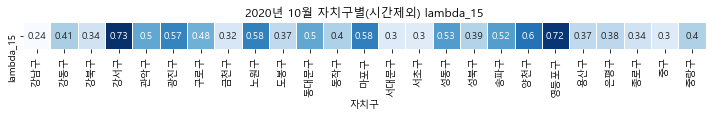

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.309863,0.503135,0.335973,0.862385,0.801845,0.896053,0.663678,0.480445,0.576919,0.381915,0.4804,0.502354,0.771915,0.358153,0.47661,0.764738,0.463701,0.641072,0.644001,0.958535,0.483385,0.526537,0.375502,0.335029,0.401744


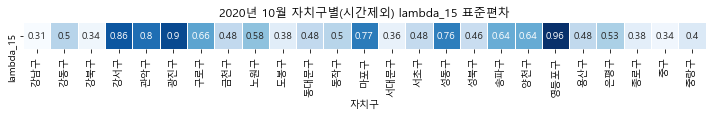

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.25058,0.400186,0.334993,0.726171,0.504901,0.567006,0.474838,0.322017,0.576306,0.365756,0.492831,0.397213,0.578296,0.31171,0.304617,0.517233,0.394407,0.517014,0.601891,0.716246,0.371299,0.369762,0.356873,0.324376,0.395712


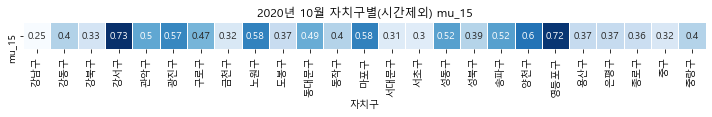

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.312791,0.468933,0.329403,0.835233,0.761382,0.814234,0.635316,0.452345,0.571602,0.361084,0.45508,0.445373,0.720734,0.331809,0.442366,0.718559,0.418983,0.634574,0.609858,0.922423,0.468428,0.471327,0.394247,0.354546,0.372824


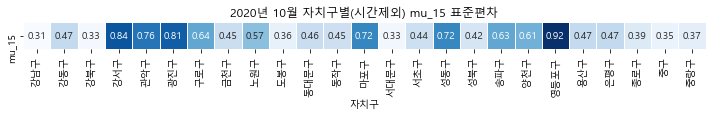

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.068486,1.133356,1.113355,1.227723,1.046037,1.082852,1.211222,1.51862,1.083831,1.176222,1.160573,1.10817,1.111813,1.100066,1.026597,1.208769,1.042146,1.156913,1.170009,1.179323,1.127058,1.126989,1.077077,1.098422,1.119225


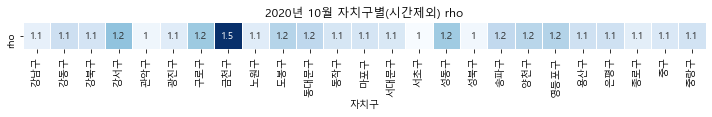

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.071866,2.065522,1.459262,4.016054,2.513249,3.241275,2.455353,1.445014,2.989943,1.901088,2.531207,2.068543,3.423381,1.496364,1.579907,2.940124,2.079414,2.872485,3.399687,4.18116,2.109226,1.980437,1.688381,1.484168,1.996355


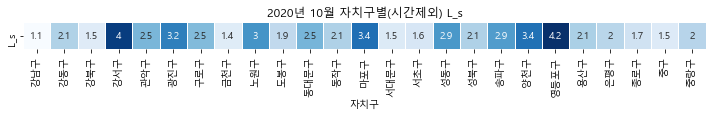

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,1.487711,2.573128,1.434026,4.586378,4.462703,6.973341,3.221758,2.162947,2.899788,2.039376,2.138199,2.770772,4.715917,1.933081,2.765591,4.413622,2.523027,3.685976,3.402819,6.052846,2.810512,3.154346,1.726826,1.510471,2.061471


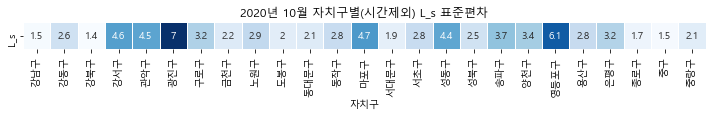

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,13.23622,13.960613,10.606439,20.509501,10.410076,16.200428,17.7513,20.03682,13.839113,15.487634,16.277017,13.48582,21.742575,13.51446,15.666407,20.15763,12.083562,19.728005,21.31531,25.665719,18.808902,13.732605,20.827259,21.960523,11.781958


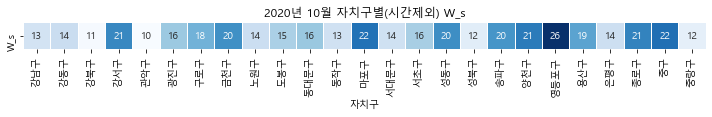

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,36.947818,36.677578,24.412517,64.077909,20.110454,47.865764,42.076036,53.628505,31.340602,37.543347,45.841838,43.309604,84.977723,28.181505,45.171723,60.38387,26.041597,61.644269,72.462097,96.883682,59.713635,47.145479,70.299391,70.809487,29.583866


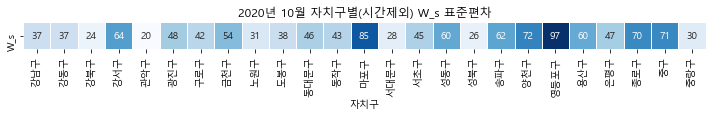

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.128921  0.130528  0.106411  0.078748  0.047430  0.026244  0.041826   
강동구  0.271706  0.241844  0.191556  0.116185  0.071822  0.063093  0.119545   
강북구  0.267680  0.318768  0.236657  0.168182  0.119941  0.081525  0.083578   
강서구  0.350641  0.319037  0.226996  0.153490  0.102195  0.099022  0.194209   
관악구  0.353912  0.372272  0.271836  0.186366  0.130544  0.116683  0.104218   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.169423  0.352583  0.259910  0.192865  0.213915  0.269546  0.299891   
강동구  0.246869  0.466429  0.287381  0.264231  0.310342  0.405408  0.459393   
강북구  0.152199  0.342082  0.231965  0.209091  0.255572  0.304692  0.339003   
강서구  0.520822  1.118148  0.629958  0.507139  0.618654  0.750066  0.804799   
관악구  0.229713  0.467868  0.351058  0.315398  0.359501  0.440398  0.504032   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.309800  0.336249  0.401244  0.493917  0.545175  0.397963  0.296884   
강동구  0.476186  0.500569  0.581214  0.717173  0.906736  0.771157  0.636622   
강북구  0.369208  0.420088  0.494575  0.541642  0.650440  0.583138  0.511730   
강서구  0.858607  0.966023  1.124603  1.397277  1.800238  1.381280  1.136634   
관악구  0.529738  0.575731  0.676285  0.828629  1.152092  1.022807  0.862651   

                                   
시간         21        22        23  
자치구                                
강남구  0.265924  0.250547  0.180085  
강동구  0.623245  0.615560  0.471442  
강북구  0.488416  0.500880  0.406012  
강서구  1.034109  0.961264  0.694011  
관악구  0.800025  0.793095  0.640373

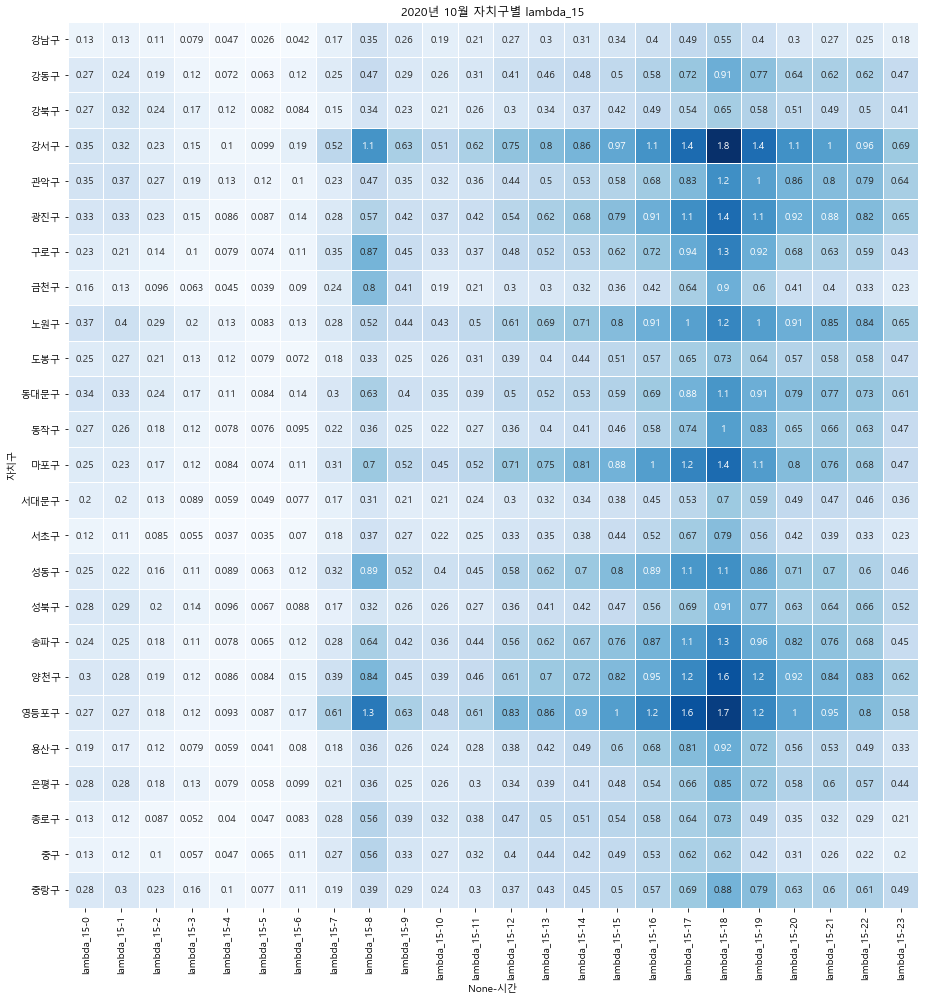

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.145599  0.125313  0.112000  0.086786  0.056763  0.035116  0.059831   
강동구  0.319412  0.259896  0.226525  0.133545  0.091279  0.074975  0.170527   
강북구  0.292497  0.240231  0.207995  0.155407  0.107908  0.091945  0.079674   
강서구  0.379666  0.289170  0.194038  0.142448  0.097292  0.124932  0.269198   
관악구  0.486294  0.423197  0.304772  0.258017  0.145912  0.160912  0.152517   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.285033  0.444012  0.337739  0.185505  0.172809  0.227885  0.258181   
강동구  0.299969  0.665216  0.332093  0.261840  0.277264  0.379370  0.411775   
강북구  0.191081  0.384367  0.212496  0.194361  0.222539  0.251674  0.259660   
강서구  0.687193  1.232277  0.603733  0.446102  0.552317  0.629960  0.692758   
관악구  0.392352  0.690328  0.448493  0.330878  0.420353  0.502738  0.574493   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.292043  0.338742  0.437333  0.473596  0.490984  0.381053  0.300045   
강동구  0.428053  0.440662  0.499750  0.651028  0.879716  0.716430  0.617514   
강북구  0.276393  0.317702  0.391733  0.423211  0.496551  0.432222  0.398118   
강서구  0.723717  0.810636  0.940098  1.233929  1.477881  1.098669  0.919417   
관악구  0.659541  0.749942  0.927848  1.173107  1.526321  1.372916  1.160465   

                                   
시간         21        22        23  
자치구                                
강남구  0.267969  0.247749  0.162889  
강동구  0.579188  0.566444  0.418827  
강북구  0.379638  0.362384  0.292604  
강서구  0.807980  0.713397  0.507846  
관악구  1.047407  1.044132  0.732577

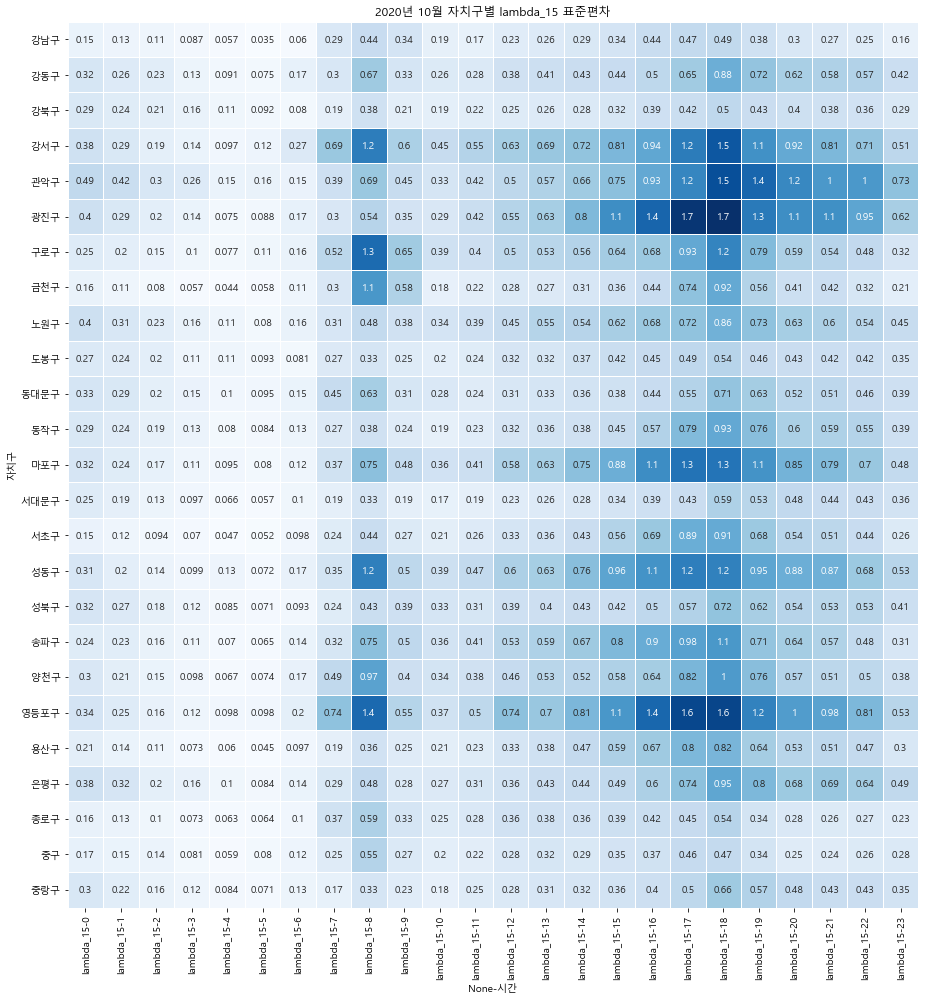

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.118354  0.119862  0.099781  0.074072  0.040596  0.031506  0.056998   
강동구  0.241106  0.219300  0.146205  0.100150  0.063283  0.072486  0.147249   
강북구  0.238317  0.297507  0.198387  0.146628  0.109238  0.072727  0.097214   
강서구  0.304659  0.272849  0.196060  0.132271  0.089635  0.108805  0.229574   
관악구  0.309696  0.293999  0.219851  0.166709  0.122228  0.116179  0.135484   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.159718  0.280071  0.240842  0.195667  0.252324  0.290049  0.319505   
강동구  0.362524  0.534509  0.326755  0.329317  0.369829  0.454744  0.505218   
강북구  0.207185  0.320674  0.265689  0.246921  0.291935  0.341496  0.402199   
강서구  0.622554  1.097889  0.614754  0.550767  0.695598  0.800238  0.846245   
관악구  0.440524  0.612651  0.429940  0.388105  0.434980  0.514743  0.573085   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.360443  0.409650  0.468289  0.607572  0.593289  0.376914  0.303308   
강동구  0.508444  0.545731  0.607021  0.696395  0.786148  0.638425  0.588710   
강북구  0.408651  0.468915  0.519501  0.543842  0.621848  0.520821  0.478886   
강서구  0.938987  1.030539  1.162811  1.493588  1.720849  1.248215  1.079984   
관악구  0.593372  0.628024  0.714970  0.823715  1.021295  0.881300  0.819178   

                                   
시간         21        22        23  
자치구                                
강남구  0.273510  0.222594  0.157395  
강동구  0.559583  0.491461  0.359393  
강북구  0.473021  0.442522  0.366129  
강서구  0.968866  0.832496  0.593271  
관악구  0.765373  0.690020  0.515751

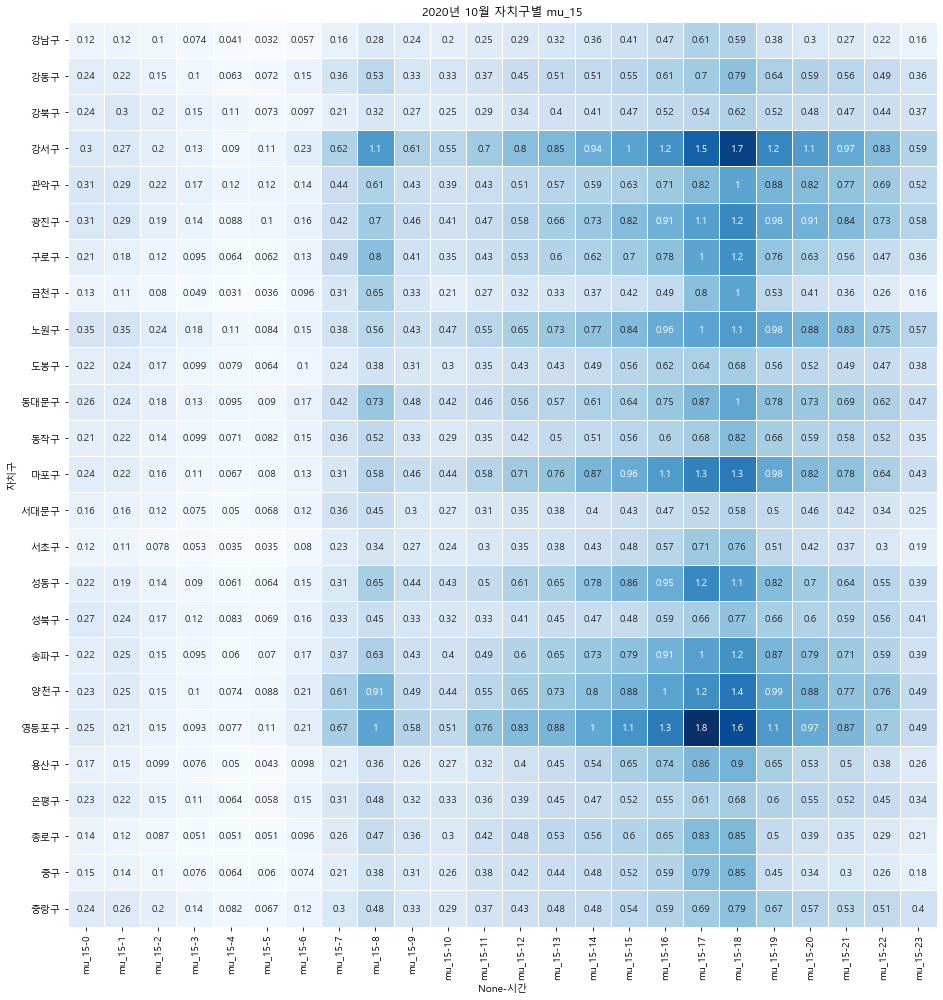

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.118092  0.103977  0.095850  0.069135  0.043600  0.038998  0.066499   
강동구  0.298812  0.247205  0.173013  0.119964  0.087731  0.086648  0.153024   
강북구  0.265198  0.255474  0.203590  0.149985  0.100855  0.077500  0.087306   
강서구  0.360602  0.279907  0.189797  0.133498  0.086890  0.098777  0.203115   
관악구  0.460359  0.352980  0.288885  0.264918  0.164266  0.140262  0.162065   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.169698  0.303778  0.191211  0.150676  0.196660  0.236046  0.252283   
강동구  0.340272  0.565262  0.324635  0.287134  0.323820  0.401737  0.457452   
강북구  0.146523  0.238011  0.176326  0.167664  0.227985  0.269199  0.295842   
강서구  0.508694  0.954890  0.444848  0.383088  0.473731  0.577740  0.635066   
관악구  0.567494  0.703227  0.480198  0.384680  0.432181  0.541590  0.586706   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.307674  0.384787  0.418303  0.620255  0.491496  0.363641  0.311430   
강동구  0.424650  0.478400  0.502515  0.613080  0.785134  0.638380  0.554604   
강북구  0.274624  0.354725  0.387556  0.420017  0.534509  0.445585  0.376426   
강서구  0.728020  0.793537  0.892949  1.213536  1.564361  1.125787  0.959857   
관악구  0.667239  0.766474  0.932722  1.060825  1.342922  1.193992  1.107633   

                                   
시간         21        22        23  
자치구                                
강남구  0.255946  0.205325  0.144619  
강동구  0.544152  0.498956  0.360019  
강북구  0.391577  0.375258  0.291749  
강서구  0.850790  0.723225  0.510571  
관악구  1.104912  0.955549  0.724155

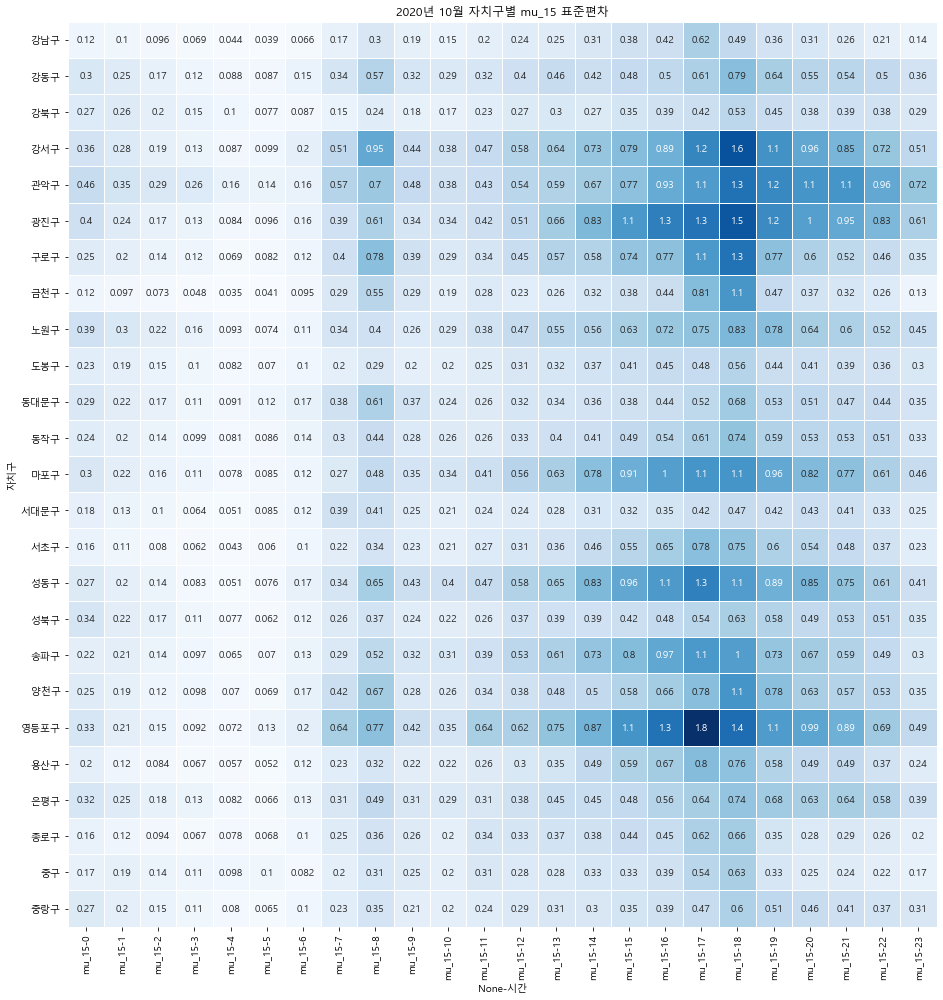

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.888318  1.142587  1.112590  1.125518  1.217422  1.069314  0.802136   
강동구  1.018986  1.360140  1.381289  1.347381  1.149413  1.321286  1.219162   
강북구  0.821868  1.427267  1.512438  1.426605  1.310962  2.118644  1.116403   
강서구  1.025755  1.357521  1.582627  1.640964  1.653045  1.196029  2.097085   
관악구  0.898008  1.400120  1.407162  1.338290  1.139917  1.228862  1.231120   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.349975  1.799701  1.270598  1.072451  0.851914  0.934775  0.943922   
강동구  0.937150  1.078559  0.876015  0.841258  0.915449  0.935130  0.912818   
강북구  0.739915  1.003019  0.947954  0.836660  0.834297  0.955443  0.941165   
강서구  1.450872  1.547561  1.290257  0.931284  0.838592  0.908376  0.923969   
관악구  0.658017  0.933313  0.813482  0.834689  0.868025  0.828346  0.867773   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.847416  0.832790  0.819324  0.865613  1.054899  1.109558  1.040175   
강동구  0.956389  0.945549  0.966941  1.043344  1.246262  1.314554  1.106716   
강북구  0.890313  0.931864  0.945287  1.015497  1.115547  1.293379  1.097986   
강서구  0.886683  0.914835  0.935615  0.972246  1.135008  1.175994  1.142902   
관악구  0.836655  0.926898  0.908839  0.937579  1.076630  1.156700  1.097429   

                                   
시간         21        22        23  
자치구                                
강남구  1.039013  1.245815  1.244822  
강동구  1.263484  1.435748  1.647237  
강북구  1.103903  1.209975  1.246020  
강서구  1.182799  1.350770  1.392418  
관악구  1.061885  1.185018  1.492668

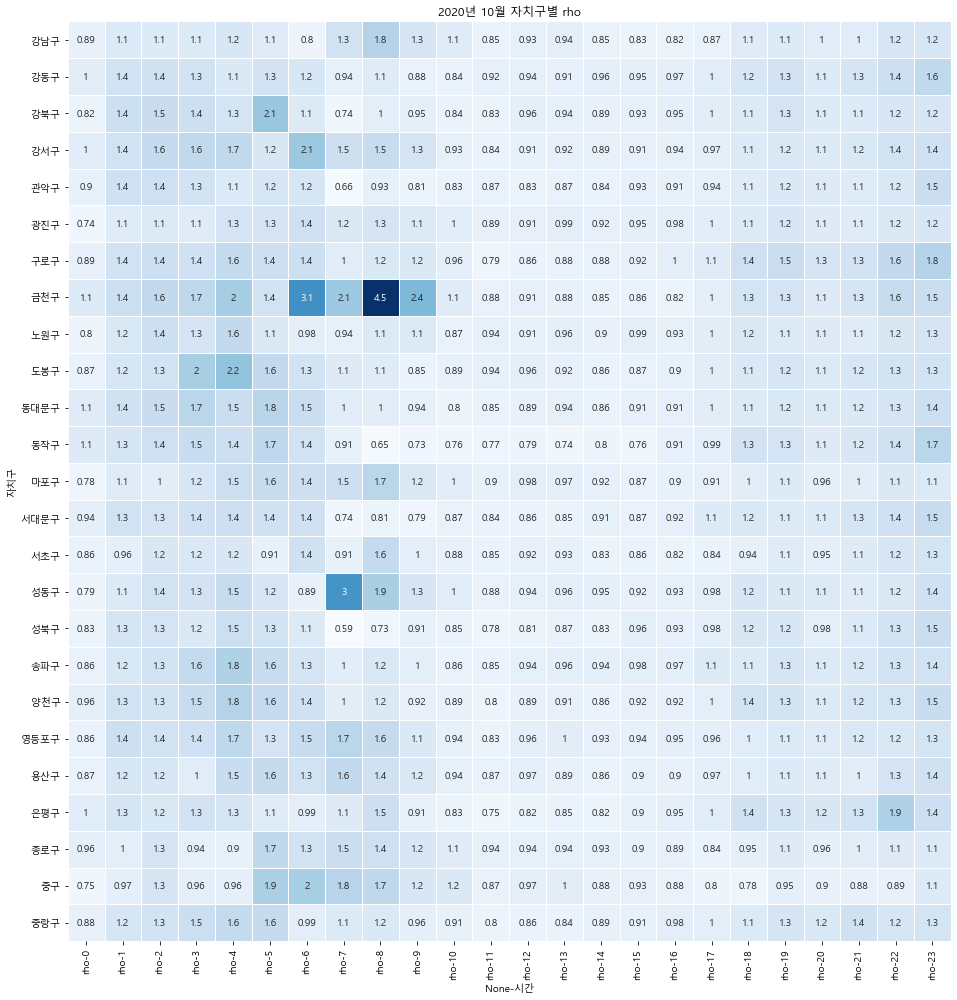

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.915835  1.153763  1.177734  1.076021  1.114475  0.759166  0.821678   
강동구  1.861882  2.366924  2.702388  2.236013  2.153466  1.812638  1.840599   
강북구  1.176882  1.620958  1.763408  1.585030  1.450943  1.512088  1.362599   
강서구  3.213553  4.112785  4.326475  4.239491  4.007447  3.978716  3.484636   
관악구  2.293878  3.359082  3.053004  2.438963  2.584962  2.442425  1.702870   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.181956  1.313829  1.161371  1.169290  0.960121  1.083251  1.120768   
강동구  1.331635  1.684524  1.690763  1.559216  1.656982  1.771106  1.779943   
강북구  1.257998  1.412174  1.417561  1.309279  1.399319  1.351007  1.242249   
강서구  3.649573  3.235209  3.829521  3.718290  3.738051  3.891001  4.069026   
관악구  1.754422  1.917187  1.817481  1.777672  2.137664  2.096999  2.277480   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.997053  0.911618  1.041559  0.980765  1.078161  1.181595  1.050961   
강동구  2.060859  1.853902  2.006115  2.298436  2.507509  2.546245  2.343909   
강북구  1.385577  1.346361  1.460634  1.527937  1.535344  1.654872  1.581503   
강서구  3.730749  3.917840  4.399144  4.543337  4.494511  4.721978  4.465361   
관악구  2.308434  2.345709  2.502673  2.949986  3.321387  3.468861  2.942053   

                                   
시간         21        22        23  
자치구                                
강남구  1.084001  1.225295  1.196033  
강동구  2.339637  2.555260  2.657112  
강북구  1.508589  1.621856  1.656215  
강서구  4.288353  4.370811  4.280213  
관악구  2.668269  3.146486  3.040223

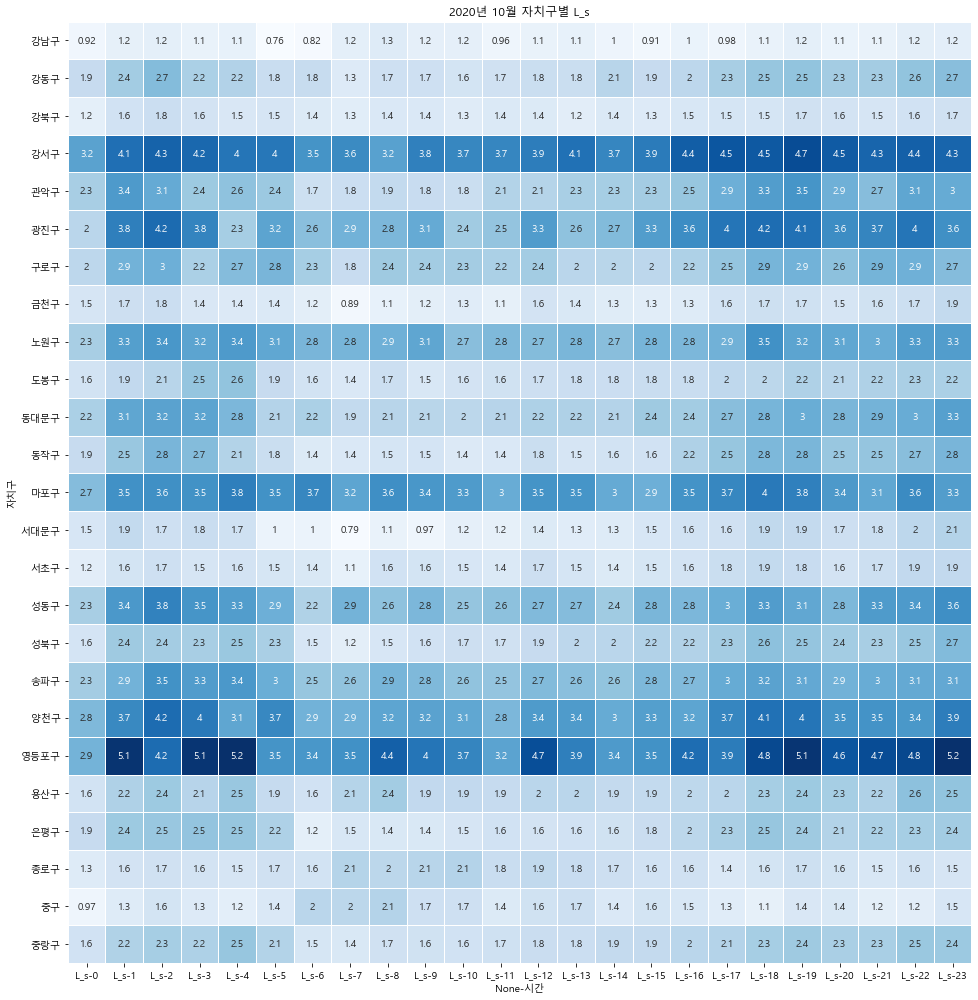

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  1.247439  1.531471  1.460381  1.238876  1.963866  1.190083  1.310507   
강동구  2.547967  2.957182  3.235619  2.956950  2.805744  3.210157  3.129723   
강북구  1.526657  1.331383  1.567959  1.539279  1.433597  1.924657  1.547440   
강서구  4.224682  3.978155  4.394291  4.369253  4.551421  6.754312  5.837813   
관악구  4.398830  5.518356  4.825641  3.792999  4.106414  4.514322  3.853087   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.764041  2.117010  2.007271  1.780693  1.019428  1.439229  1.561716   
강동구  2.013696  2.506609  2.183916  1.826084  1.665775  1.869340  1.736382   
강북구  1.816444  1.750879  1.657146  1.578595  1.369491  1.259189  1.070180   
강서구  5.646346  4.176877  5.220067  5.046330  5.203040  4.608689  4.575923   
관악구  4.500135  4.123587  2.901878  2.891882  5.328536  4.290679  4.419399   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  1.244222  1.008477  1.652432  1.198118  1.338459  1.471604  1.085779   
강동구  2.612406  1.814733  2.225356  2.692142  2.769578  2.866711  2.709536   
강북구  1.261808  1.093359  1.236191  1.289425  1.261479  1.343958  1.333320   
강서구  3.760450  3.993138  4.408793  5.075297  3.984165  3.980595  3.880977   
관악구  3.580342  3.556648  3.674250  5.421075  5.881762  5.881552  4.495653   

                                   
시간         21        22        23  
자치구                                
강남구  1.340857  1.666038  1.397163  
강동구  2.427410  2.744879  2.845551  
강북구  1.230722  1.277866  1.403125  
강서구  3.858240  3.567938  3.614519  
관악구  3.639479  5.372108  4.249954

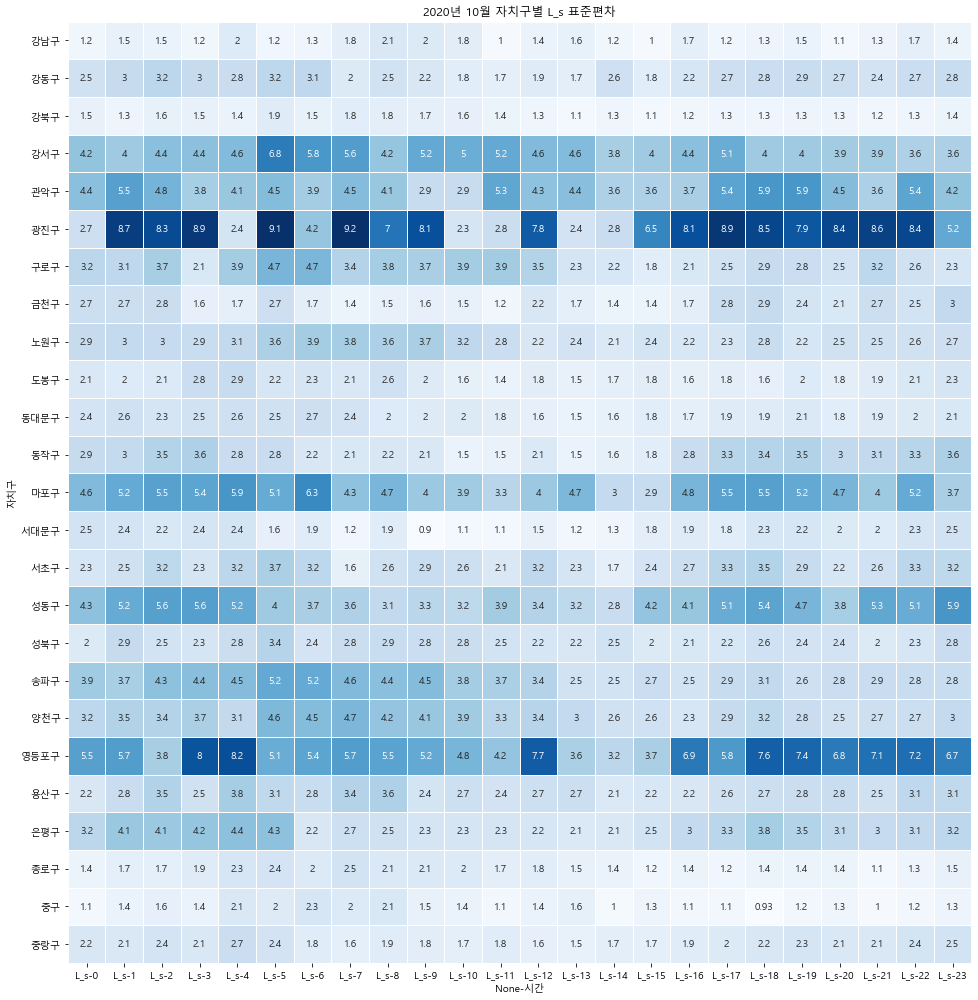

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구   9.676777  14.951766  24.040556  31.195981  50.280081  50.136387   
강동구   9.037680  19.995211  26.437746  37.829091  52.575628  59.512146   
강북구   4.753552  10.065113  21.136178  25.414988  23.837567  45.459774   
강서구  13.026889  26.442736  50.483919  75.510803  91.777801  83.749700   
관악구   6.092647  13.980970  22.614871  27.509005  27.078176  37.897917   

                                                                             \
시간          6          7         8         9         10        11        12   
자치구                                                                           
강남구  35.798513  14.243875  9.060080  6.619686  7.928478  5.753179  5.462343   
강동구  30.737998   8.996741  6.006910  8.611082  7.185095  6.588308  5.061872   
강북구  31.439964  11.372223  6.739187  8.351296  7.985676  7.338608  5.936871   
강서구  44.209278  12.799472  5.063515  9.018200  8.529354  6.193564  5.485802   
관악구  26.642460  10.053220  5.772714  6.428811  6.596318  5.822830  5.048035   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  4.603047  3.951052  3.418020  2.967617  2.472916  2.624171  4.062092   
강동구  4.788144  4.743917  4.525466  3.984809  3.832270  3.855058  4.575017   
강북구  4.552028  4.408899  4.160026  3.732992  3.520450  3.268494  4.120493   
강서구  5.452152  4.884327  4.474377  4.217698  3.557745  3.498006  5.071389   
관악구  4.629073  4.612238  4.678219  4.134493  3.636629  3.297708  3.952138   

                                              
시간         20        21        22         23  
자치구                                           
강남구  4.801218  5.851996  7.300415  11.044045  
강동구  4.870808  5.597717  6.536704  10.043248  
강북구  4.135671  4.346554  4.801033   6.124470  
강서구  5.590962  6.383100  7.785254  11.667570  
관악구  3.895301  4.318841  4.942485   7.090789

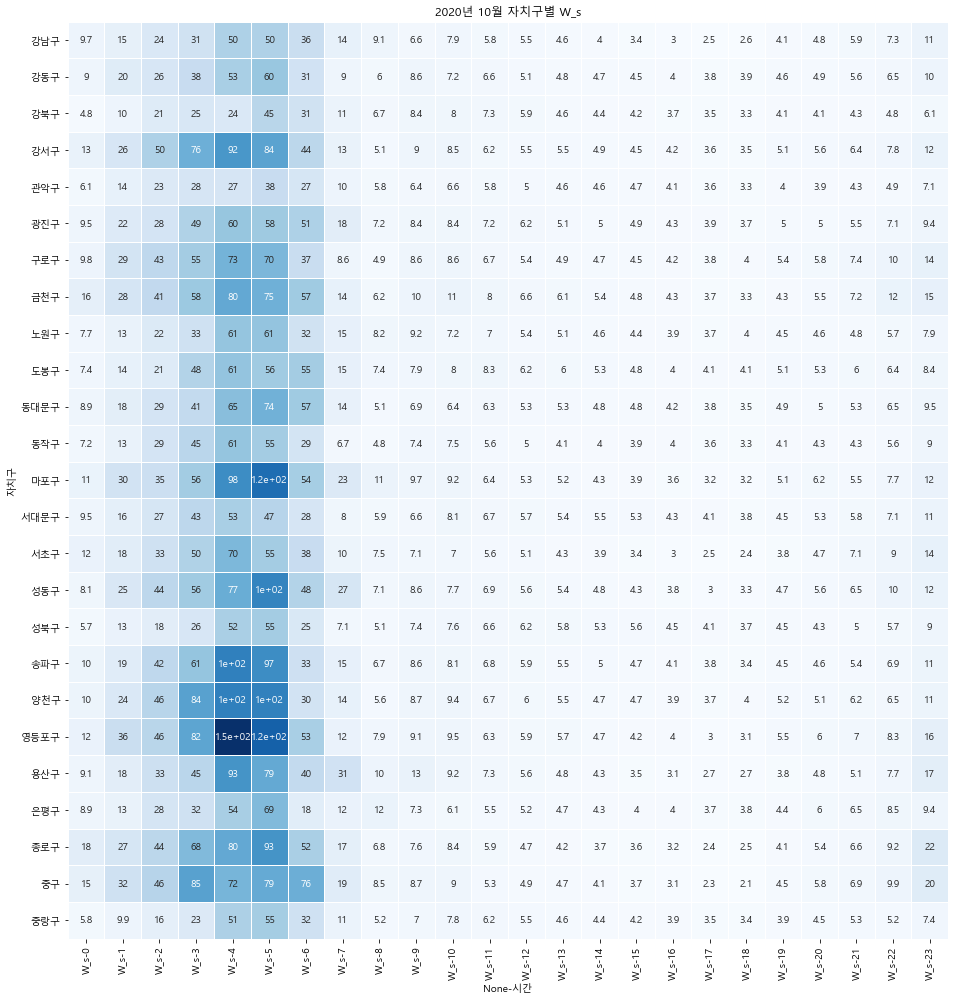

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                            \
시간          0          1          2           3           4           5    
자치구                                                                        
강남구  14.379458  22.722574  37.457670   61.903158   90.789938   90.966895   
강동구  11.204134  32.115547  28.355153   48.782904   71.367171  116.018855   
강북구   5.326047  11.926654  44.914923   48.157865   28.057270   64.110945   
강서구  19.690898  34.077165  93.146129  118.396441  130.162152  180.082219   
관악구   7.485958  22.909692  31.014126   32.583317   26.658443   50.735798   

                                                                               \
시간          6          7          8          9         10        11        12   
자치구                                                                             
강남구  71.013220  19.235581  14.623101   6.353499  6.549630  4.909160  6.533848   
강동구  59.837055  16.026888   6.424424   8.571989  6.214793  4.747780  2.697908   
강북구  44.939104  16.141269   6.842166   9.945621  6.978986  6.936778  4.897642   
강서구  95.172256  24.748581   7.280694  10.874608  7.399702  3.810174  2.459460   
관악구  36.303795  14.605792   6.171860   5.039194  4.565660  4.207219  3.552370   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  3.760970  3.301453  2.409671  1.937536  1.836529  2.823666  2.948846   
강동구  2.669538  2.673774  2.550708  2.271829  2.073628  2.314916  2.635252   
강북구  3.026865  2.495863  2.965133  2.474728  1.953917  1.934281  2.460025   
강서구  2.697539  2.429365  2.214723  1.930722  1.773431  1.973431  3.543575   
관악구  3.573920  2.832027  3.068711  2.397708  1.920090  1.929495  2.430946   

                                              
시간         20        21        22         23  
자치구                                           
강남구  3.353079  5.646764  6.024689  11.946917  
강동구  3.010691  5.271109  4.678199   9.200356  
강북구  2.295544  2.690196  3.158510   4.844555  
강서구  3.710314  4.261617  5.865017  12.970176  
관악구  2.336644  2.799092  3.166969   4.781740

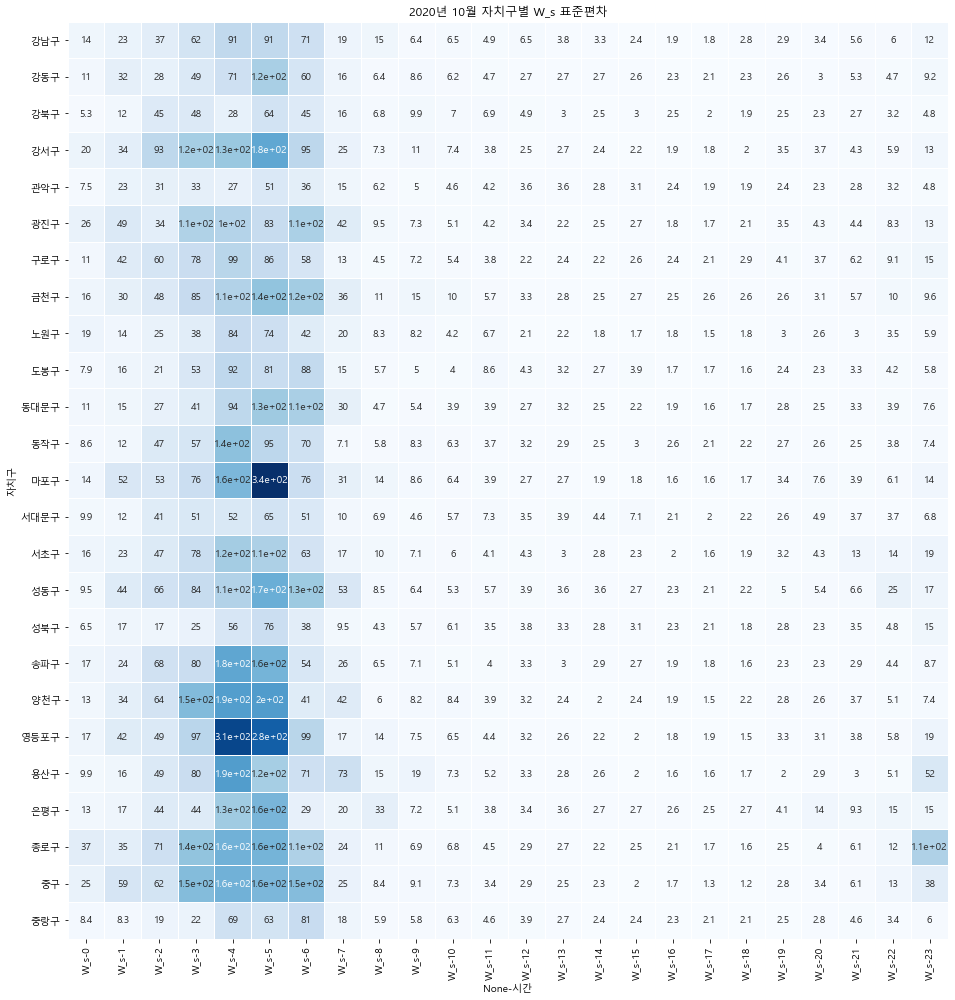

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2046,흑석한강푸르지오 106동앞
2047,흑석한강푸르지오(110동)
2048,흥국사 정류장
2049,희성오피앙


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['KC 대학교',
 '가락고등학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '목동1단지아파트 118동 앞 (월촌초등학교 정류소 옆)',
 '목동1단지아파트 상가 앞 (월촌중학교 버스정류소 옆)',
 '묘곡초등학교',
 '문래중학교',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교',
 '서울강월초등학교 앞',

In [43]:
len(school)

134

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
968,강서구,KC 대학교,0,0.169355,0.056452,3.000000,0.750000,17.714286,학교
969,강서구,KC 대학교,1,0.169355,0.040323,4.200000,0.807692,24.800000,학교
970,강서구,KC 대학교,2,0.096774,0.032258,3.000000,0.750000,31.000000,학교
971,강서구,KC 대학교,3,0.032258,0.016129,2.000000,0.666667,62.000000,학교
972,강서구,KC 대학교,4,0.032258,0.008065,4.000000,0.800000,124.000000,학교
...,...,...,...,...,...,...,...,...,...
49863,동대문구,휘봉고등학교 앞,19,0.475806,0.403226,1.180000,1.705304,5.232408,학교
49864,동대문구,휘봉고등학교 앞,20,0.467742,0.306452,1.526316,2.003501,7.419822,학교
49865,동대문구,휘봉고등학교 앞,21,0.379032,0.233871,1.620690,2.066946,9.877212,학교
49866,동대문구,휘봉고등학교 앞,22,0.491935,0.250000,1.967742,2.252535,9.679598,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '419민주묘지역 1번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고덕역 5번출구',
 '고려대학교 2번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공릉역 1번 출구 앞',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 2번출구 앞',
 '광화문역 5번출구',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞',
 '광흥창역 2번출구 앞',
 '교대역 5번출구뒤',
 '교대역 6번출구',
 '교보타워 버스정류장(신논현역 3번출구 후면)',
 '구산역 2번 출구',
 '구산역 4번출구',
 '구파발역 2번출구',
 '국회의사당역 3번출구 옆',
 '국회의사당역 5번출구 옆',
 '군자역 7번출구 베스트샵 앞',
 '군자역 7번출구뒤',
 '군자역2번출구',
 '금호역 1번출구 앞',
 '금호역 3번출구',
 '길음역 3번출구 뒤',
 '까치산역 3번 출구',
 '낙성대역 1번출구',
 '낙성대역 3번출구 뒤',
 '낙성대역 8번 출구',
 

In [46]:
len(subway)

411

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
73,강남구,3호선 매봉역 3번출구앞,0,0.040323,0.080645,0.500000,0.571429,16.533333,지하철
74,강남구,3호선 매봉역 3번출구앞,1,0.088710,0.056452,1.571429,1.291498,28.539683,지하철
75,강남구,3호선 매봉역 3번출구앞,2,0.056452,0.088710,0.636364,0.708502,15.656566,지하철
76,강남구,3호선 매봉역 3번출구앞,3,0.112903,0.016129,7.000000,1.842105,116.250000,지하철
77,강남구,3호선 매봉역 3번출구앞,4,0.008065,0.040323,0.200000,0.225806,28.933333,지하철
...,...,...,...,...,...,...,...,...,...
49962,동작구,흑석역 4번출구,20,0.435484,0.298387,1.459459,1.954433,7.527872,지하철
49963,동작구,흑석역 4번출구,21,0.395161,0.443548,0.890909,1.356152,4.335857,지하철
49964,동작구,흑석역 4번출구,22,0.467742,0.370968,1.260870,1.785430,5.804188,지하철
49965,동작구,흑석역 4번출구,23,0.338710,0.177419,1.909091,2.225645,13.547174,지하철


In [48]:
apart

['DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '건영아파트 앞',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트 옆 상가건물 앞',
 '래미안금호하이리버 아파트 102동 옆',
 '래미안라센트아파트 103동 앞',
 '래미안신공덕3차아파트',
 '래미안월곡아파트 입구',
 '리센츠아파트',
 '마천금호어울림 1차아파트 건너편',
 '멤피스아파트 앞',
 '면목 대원칸타빌아파트',
 '면목도시개발아파트 1동 앞',
 '면목삼익아파트 앞',
 '목동11단지 아파트',
 '목동5단지아파트 501동',
 '목동5단지아파트 534동

In [49]:
len(apart)

178

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
460,서대문구,DMC센트럴아이파크아파트,0,0.370968,0.475806,0.779661,1.515096,4.611570,아파트
461,서대문구,DMC센트럴아이파크아파트,1,0.346774,0.266129,1.303030,2.513956,10.613156,아파트
462,서대문구,DMC센트럴아이파크아파트,2,0.274194,0.225806,1.214286,2.382108,12.134904,아파트
463,서대문구,DMC센트럴아이파크아파트,3,0.201613,0.096774,2.083333,3.207656,34.112021,아파트
464,서대문구,DMC센트럴아이파크아파트,4,0.120968,0.032258,3.750000,3.643115,113.357502,아파트
...,...,...,...,...,...,...,...,...,...
49130,서대문구,홍은센트레빌 아파트 앞,19,0.104839,0.137097,0.764706,0.000000,0.000000,아파트
49131,서대문구,홍은센트레빌 아파트 앞,20,0.193548,0.072581,2.666667,0.000000,0.000000,아파트
49132,서대문구,홍은센트레빌 아파트 앞,21,0.064516,0.104839,0.615385,0.000000,0.000000,아파트
49133,서대문구,홍은센트레빌 아파트 앞,22,0.088710,0.104839,0.846154,0.000000,0.000000,아파트


In [51]:
park

['가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '남산공원 야외식물원 앞',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 '세종로공원',
 '솔밭공원역',
 '송이공원',
 '신내능말공원',
 '신내어울공원 앞',
 '신도림테크노근린공원',
 '신트리공원 입구',
 '앙카라공원 앞',
 '양지근린공원앞',
 '어린이대공원정문',
 '연

In [52]:
len(park)

104

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2554,마포구,가온문화공원,0,0.088710,0.096774,0.916667,1.826546,24.711840,공원
2555,마포구,가온문화공원,1,0.088710,0.032258,2.750000,3.460566,108.492457,공원
2556,마포구,가온문화공원,2,0.024194,0.064516,0.375000,0.562644,23.549191,공원
2557,마포구,가온문화공원,3,0.008065,0.024194,0.333333,0.479339,59.933333,공원
2558,마포구,가온문화공원,4,0.040323,0.016129,2.500000,3.385063,213.182266,공원
...,...,...,...,...,...,...,...,...,...
49790,중구,훈련원공원주차장 앞,20,0.314516,0.338710,0.928571,1.852136,7.107883,공원
49791,중구,훈련원공원주차장 앞,21,0.290323,0.387097,0.750000,1.444302,5.550476,공원
49792,중구,훈련원공원주차장 앞,22,0.169355,0.524194,0.323077,0.459611,2.734130,공원
49793,중구,훈련원공원주차장 앞,23,0.298387,0.314516,0.948718,1.894839,7.739657,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.169355,0.056452,3.000000,0.750000,17.714286,학교
1,강서구,KC 대학교,1,0.169355,0.040323,4.200000,0.807692,24.800000,학교
2,강서구,KC 대학교,2,0.096774,0.032258,3.000000,0.750000,31.000000,학교
3,강서구,KC 대학교,3,0.032258,0.016129,2.000000,0.666667,62.000000,학교
4,강서구,KC 대학교,4,0.032258,0.008065,4.000000,0.800000,124.000000,학교
...,...,...,...,...,...,...,...,...,...
20225,중구,훈련원공원주차장 앞,20,0.314516,0.338710,0.928571,1.852136,7.107883,공원
20226,중구,훈련원공원주차장 앞,21,0.290323,0.387097,0.750000,1.444302,5.550476,공원
20227,중구,훈련원공원주차장 앞,22,0.169355,0.524194,0.323077,0.459611,2.734130,공원
20228,중구,훈련원공원주차장 앞,23,0.298387,0.314516,0.948718,1.894839,7.739657,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.234496  0.206019  0.151908  0.092320  0.069091  0.058778  0.101970   
아파트  0.239236  0.231110  0.155152  0.097001  0.067189  0.052691  0.058626   
지하철  0.298373  0.310381  0.225141  0.148784  0.102092  0.109155  0.192705   
학교   0.205557  0.185257  0.125209  0.083035  0.058124  0.038471  0.056989   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.194789  0.428738  0.293967  0.284895  0.335453  0.449442  0.487283   
아파트  0.171348  0.339616  0.222997  0.204059  0.263637  0.336308  0.371375   
지하철  0.445020  0.773549  0.524939  0.441056  0.532258  0.673691  0.732635   
학교   0.148387  0.356810  0.233692  0.206810  0.232855  0.310335  0.352628   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.534507  0.644774  0.752792  0.892602  1.032258  0.809941  0.692540   
아파트  0.400326  0.461399  0.545805  0.692461  0.921484  0.745107  0.584451   
지하철  0.801016  0.894278  1.033671  1.316851  1.560297  1.143258  0.913252   
학교   0.362664  0.422401  0.487575  0.585066  0.720370  0.577599  0.491816   

                                   
시간         21        22        23  
특성                                 
공원   0.656560  0.611507  0.453784  
아파트  0.580826  0.589389  0.447309  
지하철  0.853034  0.755710  0.544522  
학교   0.463441  0.467861  0.364934

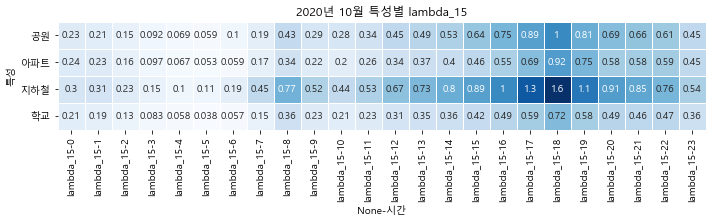

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.288461  0.216325  0.158726  0.099470  0.075500  0.079602  0.128929   
아파트  0.256153  0.191621  0.134970  0.087651  0.068888  0.056005  0.070109   
지하철  0.360472  0.285470  0.200433  0.142010  0.096604  0.118857  0.212594   
학교   0.249602  0.175027  0.122712  0.085778  0.059336  0.047147  0.068686   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.284753  0.512568  0.300099  0.274756  0.308819  0.414393  0.451260   
아파트  0.308268  0.646142  0.238654  0.182941  0.223837  0.307163  0.313822   
지하철  0.514725  0.823666  0.493800  0.386389  0.472984  0.596834  0.670232   
학교   0.151986  0.399152  0.251037  0.211680  0.216776  0.271008  0.332867   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.528023  0.675098  0.806510  0.861004  0.851634  0.680957  0.600298   
아파트  0.331561  0.380970  0.448689  0.551514  0.712385  0.564536  0.442692   
지하철  0.768002  0.941176  1.132867  1.382574  1.500782  1.117904  0.948161   
학교   0.361170  0.463247  0.563587  0.634220  0.702687  0.548028  0.463305   

                                   
시간         21        22        23  
특성                                 
공원   0.592921  0.562049  0.407799  
아파트  0.437486  0.443440  0.332094  
지하철  0.903475  0.771869  0.522129  
학교   0.437315  0.434956  0.322914

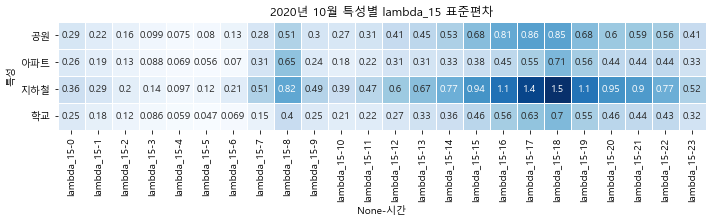

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.187415  0.179137  0.118874  0.076805  0.057227  0.074442  0.153536   
아파트  0.186134  0.183161  0.119355  0.080056  0.059261  0.078199  0.174112   
지하철  0.293787  0.275036  0.206722  0.141772  0.091359  0.076682  0.148713   
학교   0.149681  0.144025  0.094922  0.061947  0.043489  0.064397  0.138053   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.447736  0.552730  0.385158  0.350962  0.412686  0.497364  0.537609   
아파트  0.445043  0.540594  0.327791  0.299520  0.334406  0.395796  0.412604   
지하철  0.414351  0.801511  0.520387  0.454713  0.561749  0.693156  0.780316   
학교   0.340203  0.447431  0.291816  0.274432  0.302808  0.354301  0.404241   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.599023  0.684011  0.791563  0.897953  0.899194  0.645937  0.603908   
아파트  0.448124  0.507566  0.559079  0.674248  0.738855  0.582004  0.524873   
지하철  0.859450  0.958559  1.065792  1.291657  1.509909  1.121635  0.930343   
학교   0.448686  0.472939  0.545161  0.581840  0.575986  0.466308  0.419176   

                                   
시간         21        22        23  
특성                                 
공원   0.558158  0.474178  0.320177  
아파트  0.482602  0.434125  0.303461  
지하철  0.856644  0.730731  0.533239  
학교   0.375269  0.347611  0.246655

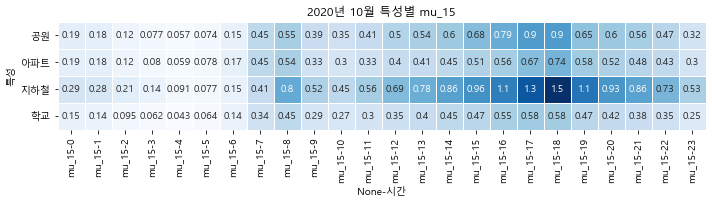

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.231710  0.181544  0.121340  0.080273  0.069542  0.087842  0.148952   
아파트  0.204616  0.152368  0.102380  0.067896  0.058959  0.081789  0.155983   
지하철  0.355231  0.256533  0.192302  0.137871  0.090722  0.083148  0.148566   
학교   0.188969  0.147136  0.096904  0.066899  0.056624  0.079792  0.156315   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.442116  0.518473  0.301687  0.278199  0.322930  0.413536  0.473266   
아파트  0.395903  0.479421  0.253516  0.223782  0.297514  0.292046  0.298767   
지하철  0.423643  0.805343  0.436615  0.368136  0.450546  0.575921  0.687719   
학교   0.347606  0.392603  0.239504  0.202060  0.235401  0.290937  0.332083   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.544934  0.692201  0.758384  0.819933  0.763638  0.560212  0.514113   
아파트  0.341397  0.408520  0.437095  0.602531  0.585450  0.455160  0.412106   
지하철  0.809419  0.957826  1.099093  1.273929  1.429964  1.069272  0.929308   
학교   0.383866  0.461484  0.515891  0.595510  0.565747  0.463744  0.419300   

                                   
시간         21        22        23  
특성                                 
공원   0.479079  0.399553  0.281075  
아파트  0.380921  0.340351  0.235155  
지하철  0.843197  0.717101  0.510465  
학교   0.368892  0.384979  0.264694

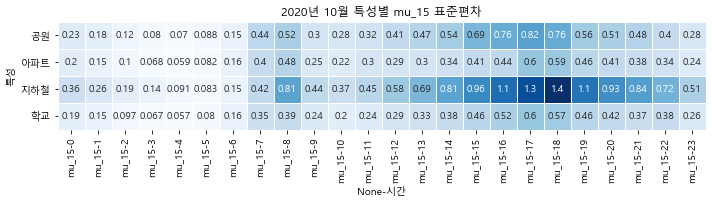

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.947992  1.226635  1.347771  1.462807  1.611635  1.042742  1.431576   
아파트  1.096043  1.419917  1.576925  1.377418  1.553510  1.160145  0.529418   
지하철  0.719145  1.174524  1.178681  1.191629  1.430962  1.977346  1.794209   
학교   1.129447  1.457853  1.410555  1.751887  1.407102  1.035467  0.873490   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.730639  0.952426  0.936436  0.847297  0.821122  0.863838  0.887794   
아파트  0.470454  0.605612  0.650228  0.656897  0.769091  0.785060  0.861274   
지하철  1.358066  1.096314  1.056633  0.992880  0.934659  0.963097  0.926840   
학교   0.855969  1.145399  1.029181  0.765781  0.807279  0.951946  0.857048   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.865257  0.936648  0.932741  1.020315  1.243225  1.317431  1.174568   
아파트  0.847714  0.904193  0.938298  1.045203  1.347750  1.331085  1.180797   
지하철  0.937734  0.918767  0.958090  1.021744  1.046294  1.026510  0.999529   
학교   0.784512  0.910870  0.846881  0.990611  1.245648  1.339234  1.297606   

                                   
시간         21        22        23  
특성                                 
공원   1.239445  1.315029  1.704896  
아파트  1.276003  1.533190  1.733857  
지하철  1.016051  1.064064  1.056664  
학교   1.324581  1.589291  1.698507

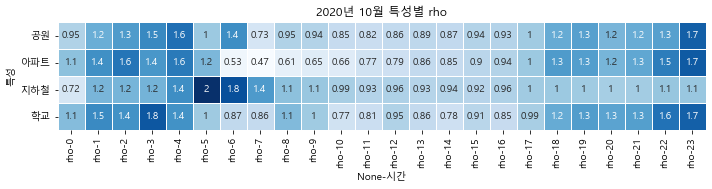

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   2.265109  2.812004  2.998380  2.625021  2.567413  1.993466  1.769655   
아파트  1.795299  2.381070  2.553914  2.335078  2.211986  1.457634  0.798700   
지하철  2.411764  3.670390  3.843131  3.656429  3.747366  4.520124  3.903883   
학교   1.502311  1.900905  1.919041  1.871674  1.637751  1.030561  0.898426   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.401193  2.137602  1.766373  1.799935  1.874605  2.162992  2.184804   
아파트  0.799106  1.159026  1.272338  1.260067  1.493431  1.661643  1.814132   
지하철  3.692696  3.430467  3.507363  3.215832  3.258831  3.572300  3.065793   
학교   0.946747  1.408593  1.286116  1.287527  1.241637  1.470919  1.472449   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   2.165972  2.403930  2.567325  2.713188  3.024470  3.201813  2.973995   
아파트  1.768086  1.819323  2.014980  2.158069  2.483093  2.539166  2.219750   
지하철  3.005121  3.153325  3.493631  3.792128  3.832429  3.577612  3.373382   
학교   1.341895  1.564435  1.609104  1.733707  2.082552  2.012934  1.946889   

                                   
시간         21        22        23  
특성                                 
공원   3.020168  3.220993  3.238099  
아파트  2.437036  2.632137  2.732712  
지하철  3.424764  3.539333  3.334243  
학교   2.001872  2.097924  2.164810

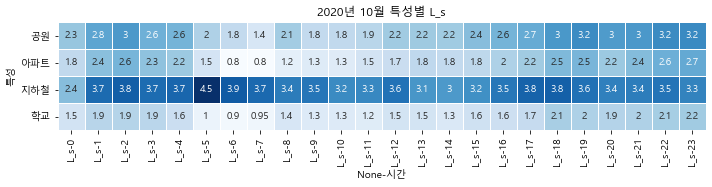

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   3.355729  3.440849  3.638866  3.474759  3.278652  3.895965  3.326142   
아파트  2.517303  2.476751  2.769362  2.666000  2.715402  2.022113  1.412496   
지하철  4.391931  5.272802  5.505783  6.264757  5.743698  6.793280  5.491328   
학교   2.115840  2.248949  2.339454  2.279841  2.572055  2.018200  1.548079   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   3.125310  3.955222  2.812123  2.365089  2.211564  2.452465  2.301500   
아파트  1.580420  1.926738  1.707967  1.395483  1.436704  1.800629  1.830436   
지하철  5.911617  5.190311  5.512916  4.139969  4.229189  5.764085  3.264019   
학교   1.848497  2.564415  2.083824  2.164208  1.525657  1.853344  1.924855   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   2.237463  2.526199  2.912904  3.107436  3.280626  3.309825  3.036348   
아파트  1.684097  1.752847  1.979196  2.059457  2.401206  2.441209  2.116178   
지하철  3.075563  4.073278  5.474149  5.616823  5.880236  5.543676  5.495250   
학교   1.497534  1.901645  2.147392  2.066288  2.469417  2.364797  2.173989   

                                   
시간         21        22        23  
특성                                 
공원   3.275725  3.443002  3.514010  
아파트  2.388873  2.537226  2.701499  
지하철  5.764328  5.713475  4.670769  
학교   2.292651  2.298424  2.351621

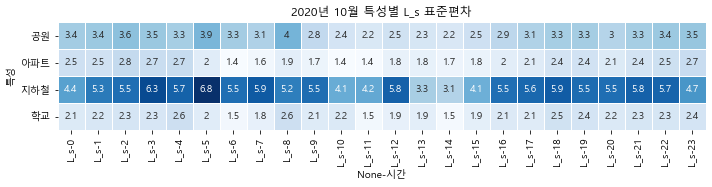

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                          \
시간          0          1          2          3          4           5    
특성                                                                       
공원   10.725978  25.677110  42.487256  59.448706  98.469387   82.413005   
아파트   8.578255  17.433848  33.265773  43.505442  72.545380   53.377133   
지하철   8.548499  20.130852  28.745960  49.749440  81.995973  107.656487   
학교   11.113346  24.584232  29.314522  60.522380  55.953170   50.132236   

                                                                             \
시간          6          7         8         9         10        11        12   
특성                                                                            
공원   37.320801   9.844782  7.235098  7.578190  7.552653  6.352720  5.400979   
아파트  17.105374   6.305161  4.371082  6.455402  6.769364  7.103291  5.688385   
지하철  48.735972  16.201996  6.510800  8.369731  8.609474  6.777980  5.710818   
학교   34.832942  13.971815  7.208737  7.667585  6.658256  6.386235  5.902149   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   5.026606  4.644784  4.426990  3.902619  3.464359  3.826191  5.377743   
아파트  5.542335  5.111063  4.729115  4.252862  3.824158  3.685826  4.533954   
지하철  4.849538  4.511272  4.027047  3.758952  3.240131  2.822566  3.665407   
학교   4.739396  4.264576  4.533724  3.785566  3.683922  3.925577  5.179787   

                                              
시간         20        21        22         23  
특성                                            
공원   5.657270  6.401224  7.492780  12.217642  
아파트  4.725537  5.587825  6.701605   9.838811  
지하철  4.467313  4.964280  6.210093   8.970688  
학교   5.856010  6.744880  8.770984  11.807064

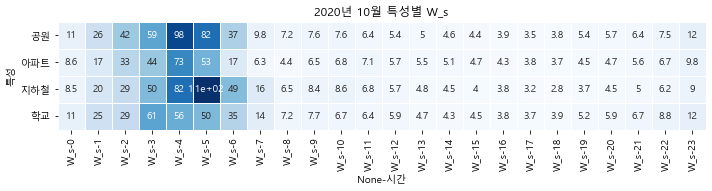

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                            \
시간          0          1          2           3           4           5    
특성                                                                         
공원   12.172947  31.863842  58.611490   73.965059  175.774054  303.956106   
아파트  11.185479  18.544309  49.197435   59.917818  107.033421  100.197695   
지하철  13.710943  29.239975  37.452319   94.700949  161.508341  162.046691   
학교   15.528723  44.139335  43.935366  117.765855   82.396625  156.347385   

                                                                               \
시간           6          7          8         9         10        11        12   
특성                                                                              
공원    72.201989  17.952722   9.701105  7.746388  6.003242  3.882624  2.894225   
아파트   29.962724   9.907301   4.725312  5.402915  5.884329  7.020284  4.557935   
지하철   77.279845  24.700285   6.511513  6.576645  5.612937  3.860433  3.127025   
학교   100.465695  36.079882  13.134663  8.689553  5.161177  6.396025  6.256702   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   2.821423  2.726348  2.623271  2.342872  1.918534  2.291920  2.986261   
아파트  3.819302  3.446800  3.522273  2.561682  2.332468  2.315555  2.771241   
지하철  2.434179  2.421501  1.872869  1.704045  1.535670  1.421192  1.737756   
학교   2.879117  2.675902  3.115520  2.427356  2.234932  2.370091  3.818807   

                                              
시간         20        21        22         23  
특성                                            
공원   4.000502  4.835682  4.692658  10.138809  
아파트  3.021122  3.816305  5.306798   7.716898  
지하철  2.444123  3.459196  4.334301   8.477074  
학교   4.412011  5.240825  8.708219  11.265378

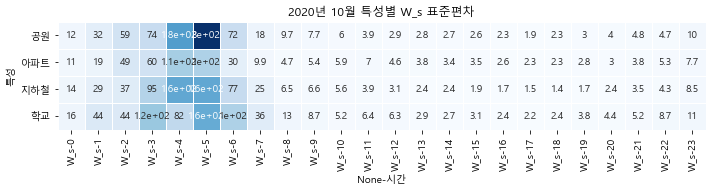

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2020년 10월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()